## Program 2: K - Means Clustering
K-Means is an unsupervised machine learning algorithm that clusters data together based on similarity metrics like Euclidean Distance.
K-Means works like this :
1. First determines the number of groups/clusters (called as K),
2. Then it randomly chooses initial K centroids from data points,
3. Next it assigns data points to the cluster of nearest centroid
3. Then it updates centroids in each iteration until clusters converge.

The K in K-Means comes from the number of clusters that need to be set prior to starting the iteration process.
We can choose the best value of K using The Elbow Method.
The best value of K is one that results in groups with minimum variance within a single cluster.
This measure is called Within Cluster Sum of Squares, or WCSS for short. The smaller the WCSS is, the closer our points are, therefore we have a more well-formed cluster.

### Data Set: wine_clustering.csv
These data are the results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. The analysis determined the quantities of 13 constituents found in each of the three types of wines.

The attributes are:

- Alcohol
- Malic acid
- Ash
- Alcalinity of ash
- Magnesium
- Total phenols
- Flavanoids
- Nonflavanoid phenols
- Proanthocyanins
- Color intensity
- Hue
- OD280/OD315 of diluted wines
- Proline

In [ ]:
# Import required libraries and read data into a dataframe
import pandas as pd
df = pd.read_csv('wine-clustering.csv')
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [ ]:
# Do some data exploration
df.describe().T


,count,mean,std,min,25%,50%,75%,max
Alcohol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
Malic_Acid,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
Ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
Ash_Alcanity,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
Magnesium,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
Total_Phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
Flavanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
Nonflavanoid_Phenols,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
Proanthocyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58
Color_Intensity,178.0,5.058090,2.318286,1.28,3.2200,4.690,6.2000,13.00


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


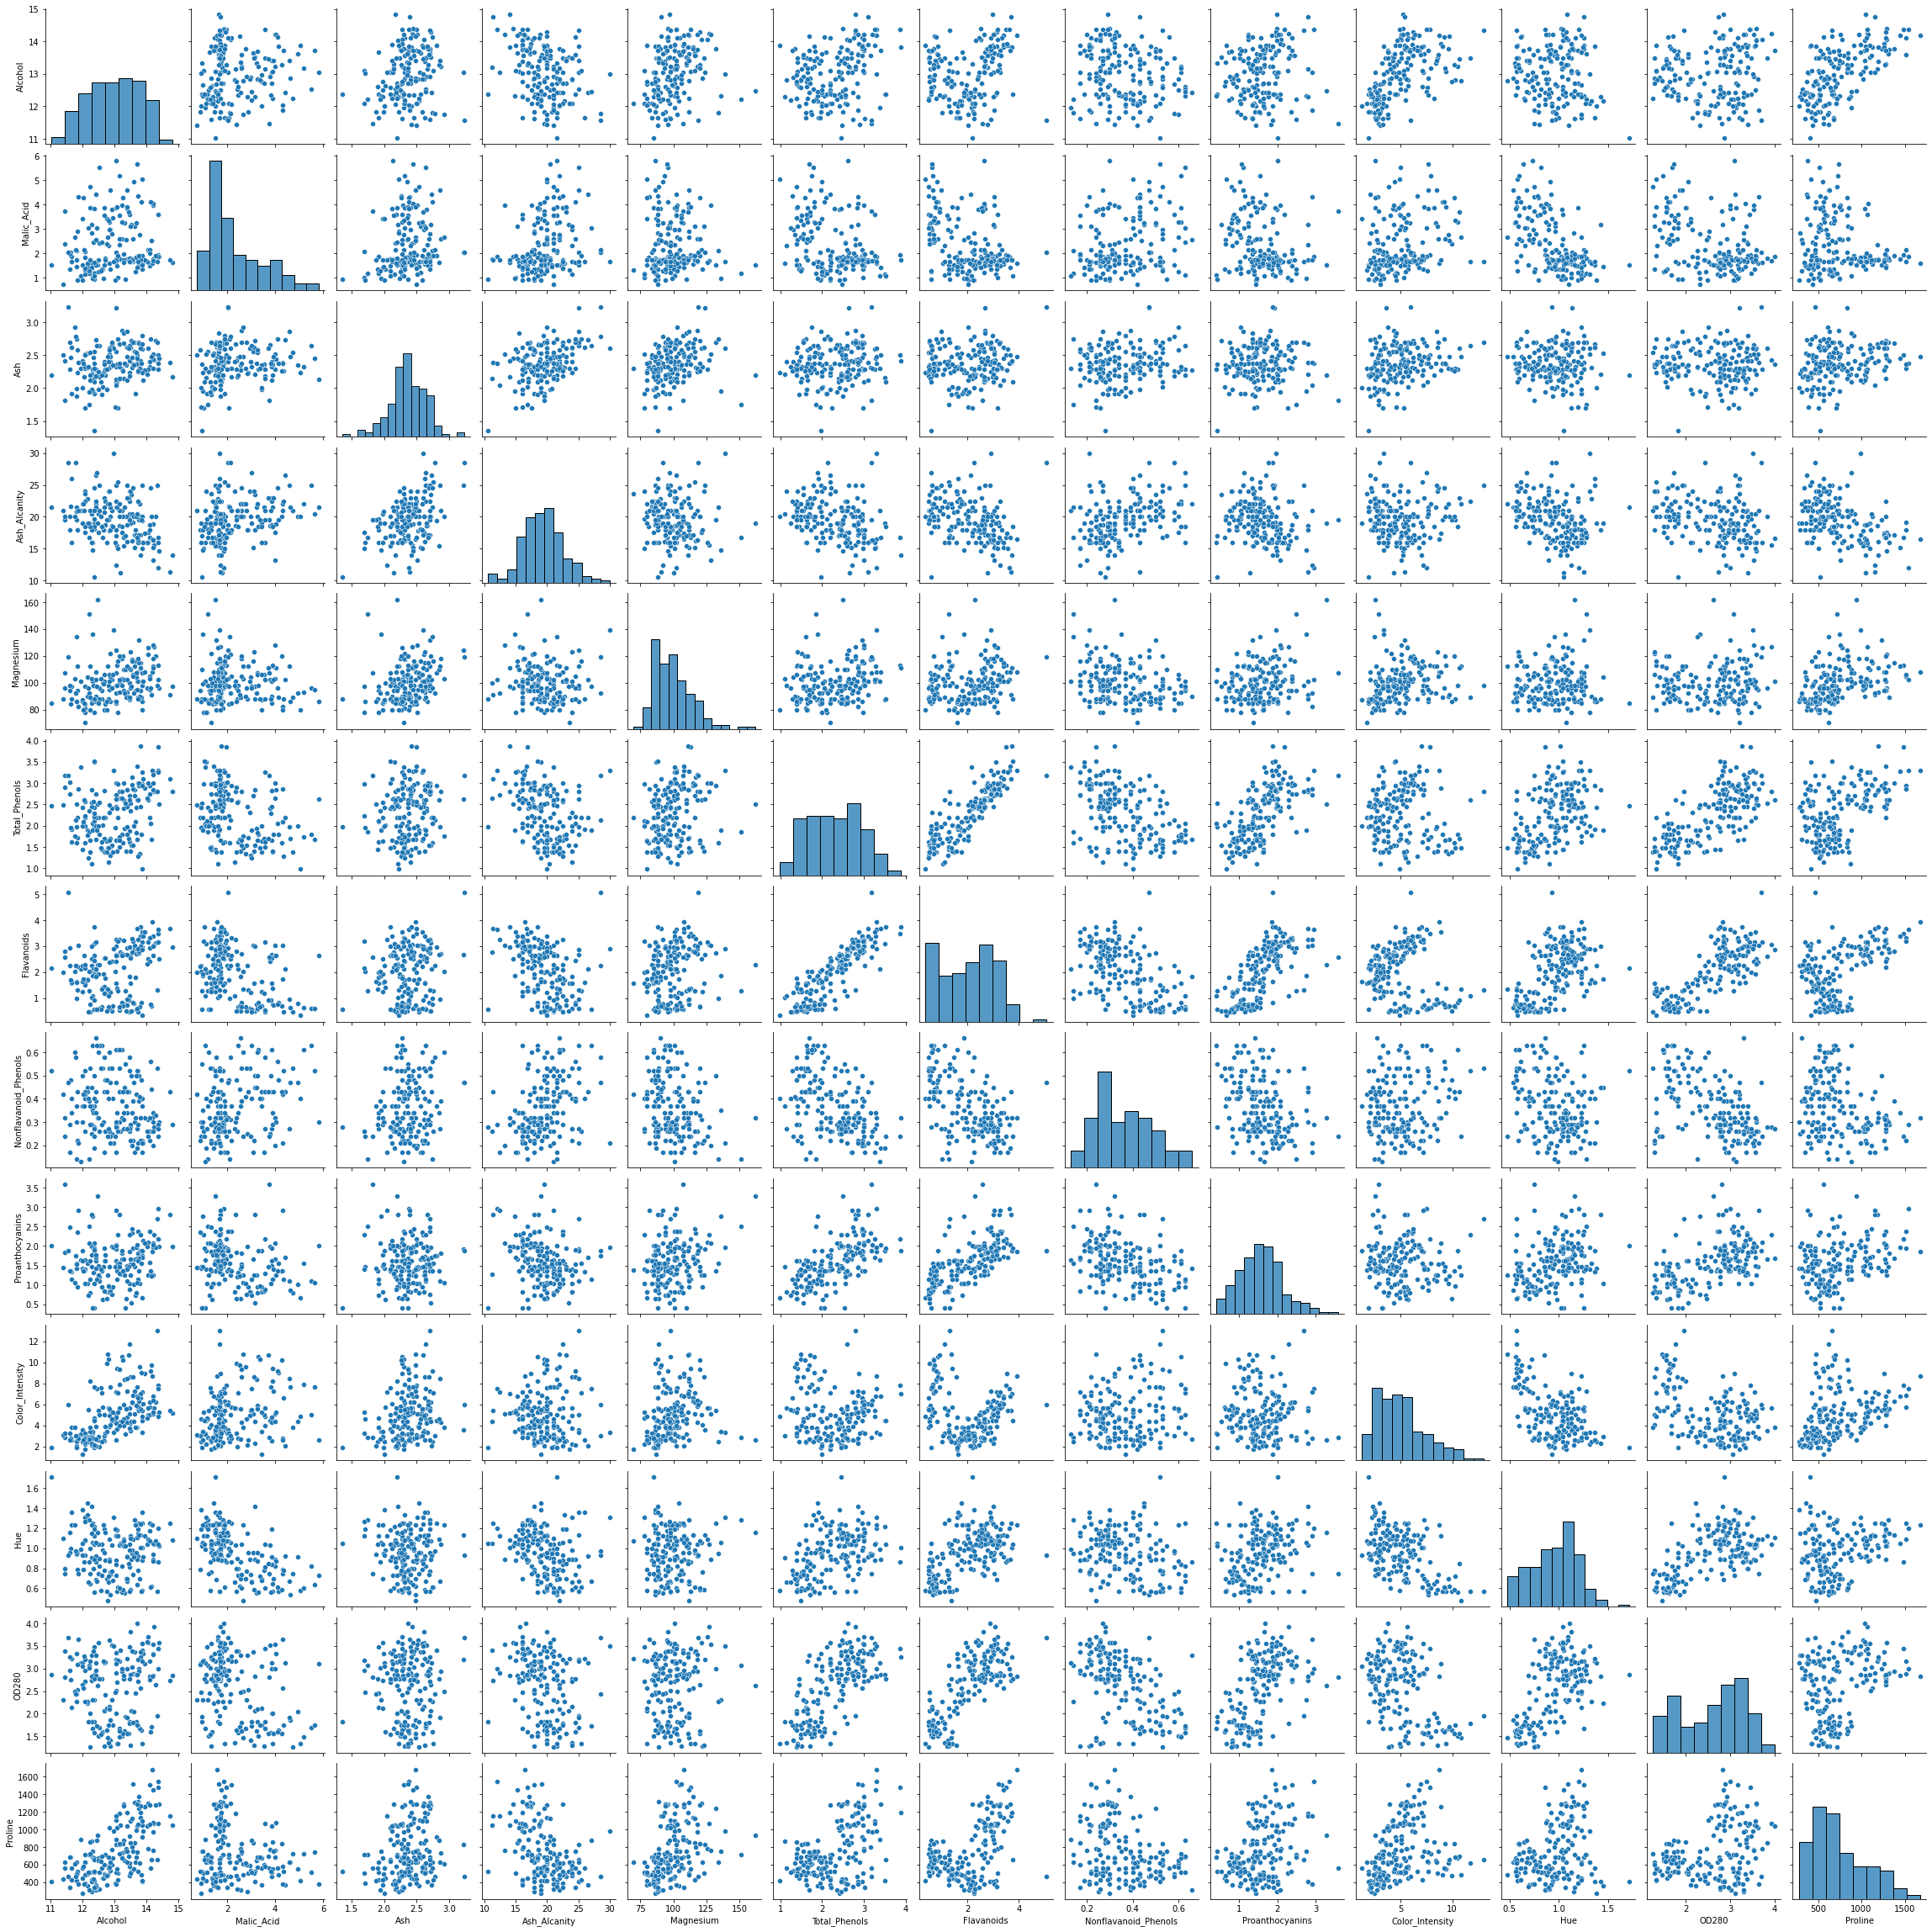

In [ ]:
# Visual data exploration to identify correlation among columns of data
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(df)

In [ ]:
#Import algorithms from sklearn
from sklearn.cluster import KMeans

#the columns we will use for clustering are only two - the OD280 and Alcohol content of wines
selected_features = df[['OD280', 'Alcohol']]

# The random_state needs to be the same number to get reproducible results
kmeans_obj = KMeans(n_clusters=3, random_state=42)

# Fit the Kmeans algorithm on selected columns
kmeans_obj.fit(selected_features)
# Predict the cluster labels for data
y_kmeans = kmeans_obj.fit_predict(selected_features)

#Print the predicted labels
print(y_kmeans)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 1 0 0 0 1 0 2 0 2 1 1 1
 0 0 2 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0
 0 0 0 0 0 0 0 2 0 0 0 0 1 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [ ]:
# Printing the cluster centers
centers = kmeans_obj.cluster_centers_
print(centers)

[[ 2.91407407 12.07444444]
 [ 3.10626866 13.73014925]
 [ 1.74385965 13.02052632]]


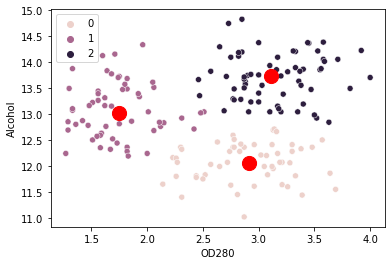

In [ ]:
#Visualize the Groups created

sns.scatterplot(x = selected_features['OD280'], y = selected_features['Alcohol'], hue=kmeans_obj.labels_)
#Visualize the cluster centroids
plt.scatter(kmeans_obj.cluster_centers_[:, 0], kmeans_obj.cluster_centers_[:, 1], s=200, c='red')